In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'cf6b8b67-c6ed-4378-80a1-493036dea09d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None)#let me see the whole column name
pd.set_option('display.max_rows', None)

In [3]:
crypto_data = pd.json_normalize(data['data'])

In [4]:
crypto_data['timestamp'] = pd.Timestamp.now()
crypto_data

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10450,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.948118e+07,1.948118e+07,False,NaN,1,NaN,NaN,None,2023-09-10T06:22:00.000Z,25862.387149,5.763415e+09,-38.6638,0.168009,0.007070,-0.138189,-12.025673,-15.616257,0.116831,5.038298e+11,48.5003,5.431101e+11,None,2023-09-10T06:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-10 09:24:13.352479
1,1027,Ethereum,ETH,ethereum,7356,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202206e+08,1.202206e+08,True,NaN,2,NaN,NaN,None,2023-09-10T06:22:00.000Z,1627.203556,2.442024e+09,-35.1089,0.165777,-0.359864,-0.542802,-11.887240,-13.564406,-6.525950,1.956233e+11,18.8325,1.956233e+11,None,2023-09-10T06:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-10 09:24:13.352479
2,825,Tether USDt,USDT,tether,61834,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.301625e+10,8.543720e+10,True,NaN,3,NaN,NaN,None,2023-09-10T06:22:00.000Z,0.999816,1.136942e+10,-27.7598,-0.006094,0.005639,-0.016447,0.130344,-0.021058,-0.045356,8.300095e+10,7.9906,8.542146e+10,None,2023-09-10T06:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-10 09:24:13.352479
3,1839,BNB,BNB,bnb,1617,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538493e+08,1.538493e+08,False,NaN,4,NaN,NaN,None,2023-09-10T06:22:00.000Z,213.011258,2.611385e+08,-8.8383,0.377960,-0.869530,-0.575632,-11.323768,-14.615301,-5.624426,3.277163e+10,3.1549,3.277163e+10,None,2023-09-10T06:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-10 09:24:13.352479
4,52,XRP,XRP,xrp,1065,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.308305e+10,9.998844e+10,False,NaN,5,NaN,NaN,None,2023-09-10T06:22:00.000Z,0.499652,3.946641e+08,-37.7366,0.196696,-0.638596,-0.901424,-21.163828,5.296621,-3.022285,2.652306e+10,2.5534,4.996522e+10,None,2023-09-10T06:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-10 09:24:13.352479
5,3408,USD Coin,USDC,usd-coin,14001,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.615234e+10,2.615234e+10,False,NaN,6,NaN,NaN,None,2023-09-10T06:22:00.000Z,1.000038,1.381540e+09,-38.2386,-0.011610,-0.013395,-0.002605,0.002751,0.007297,-0.004833,2.615334e+10,2.5178,2.615334e+10,None,2023-09-10T06:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-10 09:24:13.352479
6,2010,Cardano,ADA,cardano,930,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.508926e+10,3.615266e+10,False,NaN,7,NaN,NaN,None,2023-09-10T06:22:00.000Z,0.249297,9.420911e+07,11.8865,0.777969,-2.147503,-2.607686,-15.909748,-15.010934,-9.269561,8.747637e+09,0.8421,1.121835e+10,None,2023-09-10T06:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-10 09:24:13.352479
7,74,Dogecoin,DOGE,dogecoin,782,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.409460e+11,1.409460e+11,True,NaN,8,NaN,NaN,None,2023-09-10T06:22:00.000Z,0.062053,1.652576e+08,3.3289,0.491203,-2.167214,-2.470270,-17.888994,-5.023057,1.959196,8.746094e+09,0.8421,8.746094e+09,None,2023-09-10T06:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-10 09:24:13.352479
8,5426,Solana,SOL,solana,505,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdi

In [5]:
def run_abi():
    global crypto_data
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'cf6b8b67-c6ed-4378-80a1-493036dea09d',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
     
    
    crypto_data_updates = pd.json_normalize(data['data'])
    crypto_data_updates['timestamp'] = pd.Timestamp.now()
    crypto_data = crypto_data.append(crypto_data_updates)
    
    if not os.path.isfile(r'C:\Users\Usama\Desktop\projects for data analysis\crypto_csv'):
        crypto_data.to_csv(r'C:\Users\Usama\Desktop\projects for data analysis\crypto_csv', header='column_names')
    else:
        crypto_data.to_csv(r'C:\Users\Usama\Desktop\projects for data analysis\crypto_csv', mode='a' ,header=False)

In [6]:
import os 
from time import time
from time import sleep
for i in range(333):
    run_abi()
    print('Updated complete')
    sleep(60)
exit()

C:\Users\Usama\AppData\Local\Temp\ipykernel_15772\3190650932.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crypto_data = crypto_data.append(crypto_data_updates)


Updated complete


C:\Users\Usama\AppData\Local\Temp\ipykernel_15772\3190650932.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crypto_data = crypto_data.append(crypto_data_updates)


Updated complete


KeyboardInterrupt: 

In [7]:
df = pd.read_csv(r'C:\Users\Usama\Desktop\projects for data analysis\crypto_csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10450,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.948039e+07,1.948039e+07,False,NaN,1,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,25851.672113,7.154285e+09,-49.3297,-0.044937,-0.094267,0.140029,-12.563614,-15.045700,0.289346,5.036006e+11,48.2779,5.428851e+11,NaN,2023-09-09T12:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-09 15:38:02.273599
1,1,1027,Ethereum,ETH,ethereum,7354,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202195e+08,1.202195e+08,True,NaN,2,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,1635.014418,2.792450e+09,-51.9145,0.022159,0.359030,0.068919,-11.939577,-12.621956,-6.543443,1.965606e+11,18.8437,1.965606e+11,NaN,2023-09-09T12:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-09 15:38:02.273599
2,2,825,Tether USDt,USDT,tether,61819,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.301625e+10,8.543720e+10,True,NaN,3,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,0.999719,1.244396e+10,-42.8821,-0.001551,0.012112,-0.017307,0.066764,-0.032253,-0.054756,8.299294e+10,7.9562,8.541321e+10,NaN,2023-09-09T12:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-09 15:38:02.273599
3,3,1839,BNB,BNB,bnb,1616,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538494e+08,1.538494e+08,False,NaN,4,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,215.114584,2.439700e+08,-48.5852,-0.011865,0.250333,0.209806,-11.315235,-12.522044,-9.073045,3.309524e+10,3.1728,3.309524e+10,NaN,2023-09-09T12:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-09 15:38:02.273599
4,4,52,XRP,XRP,xrp,1065,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.308305e+10,9.998844e+10,False,NaN,5,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,0.502994,4.978711e+08,-32.4715,-0.094511,0.737890,0.950617,-20.692573,6.085979,-1.150896,2.670048e+10,2.5597,5.029944e+10,NaN,2023-09-09T12:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-09 15:38:02.273599
5,5,3408,USD Coin,USDC,usd-coin,13995,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.612717e+10,2.612717e+10,False,NaN,6,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,1.000053,1.731849e+09,-43.9296,0.000259,0.000532,-0.006179,0.011366,-0.002887,0.024008,2.612854e+10,2.5049,2.612854e+10,NaN,2023-09-09T12:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-09 15:38:02.273599
6,6,74,Dogecoin,DOGE,dogecoin,781,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.409359e+11,1.409359e+11,True,NaN,7,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,0.063642,1.324110e+08,-23.8976,0.107329,1.055406,0.354380,-15.776810,-2.016176,2.336021,8.969495e+09,0.8599,8.969495e+09,NaN,2023-09-09T12:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-09 15:38:02.273599
7,7,2010,Cardano,ADA,cardano,929,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.508803e+10,3.615266e+10,False,NaN,8,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,0.254745,6.841073e+07,-40.7588,-0.007075,0.219987,-0.251151,-14.836359,-12.667961,-5.731833,8.938490e+09,0.8569,1.146351e+10,NaN,2023-09-09T12:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-09 15:38:02.273599
8,8,5426,Solana,SOL,solana,505,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosy

In [8]:
pd.set_option('display.float_format', lambda x : '% 5f' %x)

In [9]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10450,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.000000,19480387.000000,19480387.000000,False,NaN,1,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,25851.672113,7154285204.399264,-49.329700,-0.044937,-0.094267,0.140029,-12.563614,-15.045700,0.289346,503600577348.804871,48.277900,542885114362.710022,NaN,2023-09-09T12:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-09 15:38:02.273599
1,1,1027,Ethereum,ETH,ethereum,7354,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120219494.806038,120219494.806038,True,NaN,2,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,1635.014418,2792449870.983104,-51.914500,0.022159,0.359030,0.068919,-11.939577,-12.621956,-6.543443,196560607327.603760,18.843700,196560607327.600006,NaN,2023-09-09T12:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-09 15:38:02.273599
2,2,825,Tether USDt,USDT,tether,61819,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83016246102.323624,85437198727.249512,True,NaN,3,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,0.999719,12443962996.821505,-42.882100,-0.001551,0.012112,-0.017307,0.066764,-0.032253,-0.054756,82992937440.718170,7.956200,85413210329.229996,NaN,2023-09-09T12:36:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-09 15:38:02.273599
3,3,1839,BNB,BNB,bnb,1616,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153849376.828564,153849376.828564,False,NaN,4,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,215.114584,243970013.231237,-48.585200,-0.011865,0.250333,0.209806,-11.315235,-12.522044,-9.073045,33095244658.763168,3.172800,33095244658.759998,NaN,2023-09-09T12:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-09 15:38:02.273599
4,4,52,XRP,XRP,xrp,1065,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.000000,53083046512.000000,99988441546.000000,False,NaN,5,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,0.502994,497871143.191546,-32.471500,-0.094511,0.737890,0.950617,-20.692573,6.085979,-1.150896,26700475105.184349,2.559700,50299439952.360001,NaN,2023-09-09T12:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-09 15:38:02.273599
5,5,3408,USD Coin,USDC,usd-coin,13995,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,26127167917.977325,26127167917.977325,False,NaN,6,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,1.000053,1731849231.237339,-43.929600,0.000259,0.000532,-0.006179,0.011366,-0.002887,0.024008,26128540476.497269,2.504900,26128540476.500000,NaN,2023-09-09T12:36:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-09 15:38:02.273599
6,6,74,Dogecoin,DOGE,dogecoin,781,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,140935926383.705231,140935926383.705231,True,NaN,7,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,0.063642,132410965.191506,-23.897600,0.107329,1.055406,0.354380,-15.776810,-2.016176,2.336021,8969495389.991486,0.859900,8969495389.990000,NaN,2023-09-09T12:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-09 15:38:02.273599
7,7,2010,Cardano,ADA,cardano,929,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.000000,35088025232.158997,36152657252.524002,False,NaN,8,NaN,NaN,NaN,2023-09-09T12:36:00.000Z,0.254745,68410725.858737,-40.75880

In [10]:
df1 = df.groupby('name', sort= False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df1

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.010773,-0.045008,0.078585,-12.318510,-15.174568,0.225446
Ethereum,0.036970,0.130061,-0.127094,-11.837237,-12.870230,-6.548585
Tether USDt,-0.003039,0.015134,-0.010371,0.086690,-0.028756,-0.054455
BNB,0.062018,-0.086822,-0.030803,-11.245597,-13.131770,-8.183362
XRP,-0.022657,0.328609,0.481841,-20.727317,5.877499,-1.633637
USD Coin,-0.002782,0.002757,0.001871,0.013778,0.007234,0.016236
Dogecoin,0.148206,0.147295,-0.450490,-16.240652,-2.858909,2.254674
Cardano,0.161347,-0.439154,-0.892169,-14.976748,-13.321036,-6.648600
Solana,0.318087,-1.664226,-1.577466,-21.569937,-12.859262,24.607749


In [11]:
df2 = df1.stack()
df2

name                                         
Bitcoin          quote.USD.percent_change_1h      0.010773
                 quote.USD.percent_change_24h    -0.045008
                 quote.USD.percent_change_7d      0.078585
                 quote.USD.percent_change_30d   -12.318510
                 quote.USD.percent_change_60d   -15.174568
                 quote.USD.percent_change_90d     0.225446
Ethereum         quote.USD.percent_change_1h      0.036970
                 quote.USD.percent_change_24h     0.130061
                 quote.USD.percent_change_7d     -0.127094
                 quote.USD.percent_change_30d   -11.837237
                 quote.USD.percent_change_60d   -12.870230
                 quote.USD.percent_change_90d    -6.548585
Tether USDt      quote.USD.percent_change_1h     -0.003039
                 quote.USD.percent_change_24h     0.015134
                 quote.USD.percent_change_7d     -0.010371
                 quote.USD.percent_change_30d     0.086690
          

In [12]:
type(df2)

pandas.core.series.Series

In [13]:
df3 = df2.to_frame(name='values')
df3

values
name                                                   
Bitcoin         quote.USD.percent_change_1h    0.010773
                quote.USD.percent_change_24h  -0.045008
                quote.USD.percent_change_7d    0.078585
                quote.USD.percent_change_30d -12.318510
                quote.USD.percent_change_60d -15.174568
                quote.USD.percent_change_90d   0.225446
Ethereum        quote.USD.percent_change_1h    0.036970
                quote.USD.percent_change_24h   0.130061
                quote.USD.percent_change_7d   -0.127094
                quote.USD.percent_change_30d -11.837237
                quote.USD.percent_change_60d -12.870230
                quote.USD.percent_change_90d  -6.548585
Tether USDt     quote.USD.percent_change_1h   -0.003039
                quote.USD.percent_change_24h   0.015134
                quote.USD.percent_change_7d   -0.010371
                quote.USD.percent_change_30d   0.086690
                quote.USD.percent_change_60d  -0.028756
                quote.USD.percent_change_90d  -0.054455
BNB             quote.USD.percent_change_1h    0.062018
                quote.USD.percent_change_24h  -0.086822
                quote.USD.percent_change_7d   -0.030803
                quote.USD.percent_change_30d -11.245597
                quote.USD.percent_change_60d -13.131770
                quote.USD.percent_change_90d  -8.183362
XRP             quote.USD.percent_change_1h   -0.022657
                quote.USD.percent_change_24h   0.328609
                quote.USD.percent_change_7d    0.481841
                quote.USD.percent_change_30d -20.727317
                quote.USD.percent_change_60d   5.877499
                quote.USD.percent_change_90d  -1.633637
USD Coin        quote.USD.percent_change_1h   -0.002782
                quote.USD.percent_change_24h   0.002757
                quote.USD.percent_change_7d    0.001871
                quote.USD.percent_change_30d   0.013778
                quote.USD.percent_change_60d   0.007234
                quote.USD.percent_change_90d   0.016236
Dogecoin        quote.USD.percent_change_1h    0.148206
                quote.USD.percent_change_24h   0.147295
                quote.USD.percent_change_7d   -0.450490
                quote.USD.percent_change_30d -16.240652
                quote.USD.percent_change_60d  -2.858909
                quote.USD.percent_change_90d   2.254674
Cardano         quote.USD.percent_change_1h    0.161347
                quote.USD.percent_change_24h  -0.439154
                quote.USD.percent_change_7d   -0.892169
                quote.USD.percent_change_30d -14.976748
                quote.USD.percent_change_60d -13.321036
                quote.USD.percent_change_90d  -6.648600
Solana          quote.USD.percent_change_1h    0.318087
                quote.USD.percent_change_24h  -1.664226
                quote.USD.percent_change_7d   -1.577466
                quote.USD.percent_change_30d -21.569937
                quote.USD.percent_change_60d -12.859262
                quote.USD.percent_change_90d  24.607749
TRON            quote.USD.percent_change_1h    0.112148
                quote.USD.percent_change_24h   0.337833
                quote.USD.percent_change_7d    2.908066
                quote.USD.percent_change_30d   2.022631
                quote.USD.percent_change_60d   2.228783
                quote.USD.percent_change_90d  13.745962
Toncoin         quote.USD.percent_change_1h   -0.010658
                quote.USD.percent_change_24h   0.593597
                quote.USD.percent_change_7d   -5.503490
                quote.USD.percent_change_30d  42.464294
                quote.USD.percent_change_60d  31.654948
                quote.USD.percent_change_90d  21.798051
Dai             quote.USD.percent_change_1h    0.004604
                quote.USD.percent_change_24h  -0.014197
                quote.USD.percent_change_7d   -0.011789
                quote.USD.percent_change_30d   0.020541
                q

In [14]:
df4 = df3.reset_index()
df4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.010773
1,Bitcoin,quote.USD.percent_change_24h,-0.045008
2,Bitcoin,quote.USD.percent_change_7d,0.078585
3,Bitcoin,quote.USD.percent_change_30d,-12.318510
4,Bitcoin,quote.USD.percent_change_60d,-15.174568
5,Bitcoin,quote.USD.percent_change_90d,0.225446
6,Ethereum,quote.USD.percent_change_1h,0.036970
7,Ethereum,quote.USD.percent_change_24h,0.130061
8,Ethereum,quote.USD.percent_change_7d,-0.127094
9,Ethereum,quote.USD.percent_change_30d,-11.837237


In [15]:
df5 = df4.rename(columns = {'level_1' : 'percent_changes'})

In [16]:
df5 = df5.replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['One_Hour','One_Day','One_Week','One_Month','Two_month','Three_Month'])
df5

,name,percent_changes,values
0,Bitcoin,One_Hour,0.010773
1,Bitcoin,One_Day,-0.045008
2,Bitcoin,One_Week,0.078585
3,Bitcoin,One_Month,-12.318510
4,Bitcoin,Two_month,-15.174568
5,Bitcoin,Three_Month,0.225446
6,Ethereum,One_Hour,0.036970
7,Ethereum,One_Day,0.130061
8,Ethereum,One_Week,-0.127094
9,Ethereum,One_Month,-11.837237


(<seaborn.axisgrid.FacetGrid at 0x22f2dffda00>,)

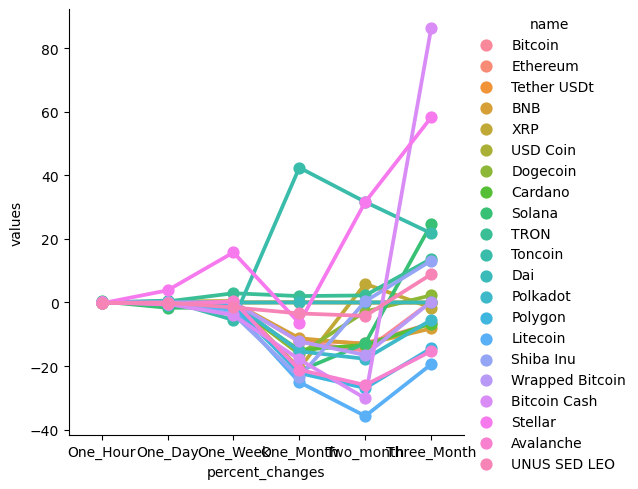

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.catplot(x= 'percent_changes',y='values', hue = 'name', data = df5, kind ='point'),

In [18]:
df6 = df[['name','quote.USD.price','timestamp']]
df6 = df6.query('name == "Bitcoin"')
df6

,name,quote.USD.price,timestamp
0,Bitcoin,25851.672113,2023-09-09 15:38:02.273599
20,Bitcoin,25849.932480,2023-09-09 15:44:19.538747
40,Bitcoin,25851.672113,2023-09-09 15:38:02.273599
60,Bitcoin,25849.932480,2023-09-09 15:44:19.538747
80,Bitcoin,25850.755330,2023-09-09 15:47:07.090652
100,Bitcoin,25851.672113,2023-09-09 15:38:02.273599
120,Bitcoin,25849.932480,2023-09-09 15:44:19.538747
140,Bitcoin,25850.755330,2023-09-09 15:47:07.090652
160,Bitcoin,25851.409815,2023-09-09 15:48:07.610685
180,Bitcoin,25851.672113,2023-09-09 15:38:02.273599


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

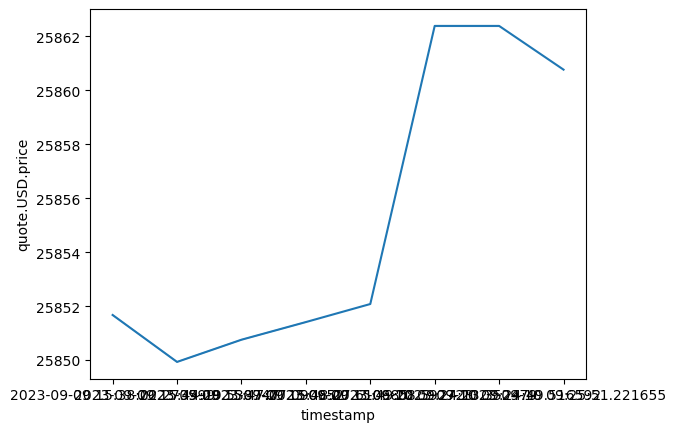

In [19]:
sns.lineplot(x='timestamp', y='quote.USD.price', data = df6)